In [69]:
#Cloning yolov5 github repository from ultralytics
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [1]:
# import required dependencies

import numpy as np 
import pandas as pd
import os
from tqdm.auto import tqdm
import shutil as sh
from sklearn.model_selection import train_test_split
from PIL import Image

import matplotlib.pyplot as plt
import ast

%matplotlib inline

In [2]:
DATA_PATH = "input/train/"
OUTPUT_PATH = "wheat_data/"

In [3]:
def process_data(data, data_type='train'): 
    """This function processes data and stores the data in the Yolo format"""
    for _, row in tqdm(data.iterrows(),total=len(data)):
        image_name = row['image_id']
        bounding_boxes = row['bboxes']
        yolo_data = []
        for bbox in bounding_boxes:
            x = bbox[0]
            y = bbox[1]
            w = bbox[2]
            h = bbox[3]
            x_center = x + w / 2
            y_center = y + h / 2
            x_center /= 1024.0
            y_center /=1024.0
            w /= 1024.0
            h /= 1024.0
            yolo_data.append([0,x_center, y_center, w, h])
        yolo_data = np.array(yolo_data)
        np.savetxt(
            os.path.join(OUTPUT_PATH, f"labels/{data_type}/{image_name}.txt"),
            yolo_data,
            fmt=["%d", "%f", "%f", "%f", "%f"]
        )
        sh.copyfile(
            os.path.join(DATA_PATH,f"{image_name}.jpg"),
            os.path.join(OUTPUT_PATH,f"images/{data_type}/{image_name}.jpg")
        )


In [4]:
#Reading data
df = pd.read_csv('input/train.csv')
df['bbox'] = df['bbox'].apply(ast.literal_eval)
df = df.groupby('image_id')['bbox'].apply(list).reset_index(name='bboxes')
#Splitting data into train and validation
df_train, df_valid = train_test_split(df,test_size=0.1,random_state=52,shuffle=True)
df_train.reset_index(drop=True,inplace=True)

df_valid.reset_index(drop=True,inplace=True)

In [5]:
#Processing data
process_data(df_train,data_type='train')
process_data(df_valid,data_type='validation')

In [6]:
#Training Yolo V5
!python train.py --img 1024 --batch 4 --epochs 1 --data input/config/wheat.yaml --cfg input/config/yolov5s.yaml --name wheat

YOLOv5  torch 1.8.0+cpu CPU

Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='input/config/yolov5s.yaml', data='input/config/wheat.yaml', device='', entity=None, epochs=1, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[1024, 1024], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='wheat', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs\\train\\wheat6', single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5s.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=

github: skipping check (not a git repository)
Plotting labels... 

autoanchor: Analyzing anchors... anchors/target = 5.72, Best Possible Recall (BPR) = 0.9991
                 all         338    1.55e+04        0.49       0.687       0.548       0.127
Optimizer stripped from runs\train\wheat6\weights\last.pt, 14.5MB
Optimizer stripped from runs\train\wheat6\weights\best.pt, 14.5MB


  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1    656896  models.common.SPP                       [512, 512, [5, 9, 13]]        
  9                -1  1   1182720  models.common.C3                        [512, 512, 1, False]          
 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 12           [-1, 6]  1         0  models.common.Concat                    [1]                           
 13                -1  1    361984  models.common.C3                        [512, 256, 1, False]          
 14                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 15                -1  1         0  t

       0/0        0G    0.1064    0.3806         0     0.487       295      1024:  13%|#3        | 102/759 [46:13<4:52:10, 26.68s/it]
       0/0        0G    0.1064    0.3822         0    0.4886       306      1024:  13%|#3        | 102/759 [46:40<4:52:10, 26.68s/it]
       0/0        0G    0.1064    0.3822         0    0.4886       306      1024:  14%|#3        | 103/759 [46:40<4:52:55, 26.79s/it]
       0/0        0G    0.1063    0.3816         0    0.4879       165      1024:  14%|#3        | 103/759 [47:06<4:52:55, 26.79s/it]
       0/0        0G    0.1063    0.3816         0    0.4879       165      1024:  14%|#3        | 104/759 [47:06<4:49:56, 26.56s/it]
       0/0        0G    0.1063    0.3808         0    0.4871       175      1024:  14%|#3        | 104/759 [47:32<4:49:56, 26.56s/it]
       0/0        0G    0.1063    0.3808         0    0.4871       175      1024:  14%|#3        | 105/759 [47:32<4:48:27, 26.46s/it]
       0/0        0G    0.1063    0.3812         0    0.4875  

       0/0        0G    0.1003    0.3866         0    0.4869       176      1024:  30%|###       | 228/759 [1:42:34<3:47:23, 25.69s/it]
       0/0        0G    0.1002    0.3861         0    0.4864       178      1024:  30%|###       | 228/759 [1:42:59<3:47:23, 25.69s/it]
       0/0        0G    0.1002    0.3861         0    0.4864       178      1024:  30%|###       | 229/759 [1:42:59<3:43:46, 25.33s/it]
       0/0        0G    0.1002    0.3857         0    0.4859       171      1024:  30%|###       | 229/759 [1:43:23<3:43:46, 25.33s/it]
       0/0        0G    0.1002    0.3857         0    0.4859       171      1024:  30%|###       | 230/759 [1:43:23<3:39:09, 24.86s/it]
       0/0        0G    0.1001    0.3856         0    0.4857       222      1024:  30%|###       | 230/759 [1:43:47<3:39:09, 24.86s/it]
       0/0        0G    0.1001    0.3856         0    0.4857       222      1024:  30%|###       | 231/759 [1:43:47<3:37:28, 24.71s/it]
       0/0        0G    0.1001    0.3852        

In [27]:
#Predicting model output for test data
!python detect.py --weights runs/train/wheat6/weights/best.pt --source input/test/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='input/test/', update=False, view_img=False, weights=['runs/train/wheat6/weights/best.pt'])
Fusing layers... 
image 1/10 C:\Users\Sanket Bangal\AppliedAI\Projects\Global Wheat Detection\YOLOv5\input\test\2fd875eaa.jpg: 640x640 35 wheats, Done. (0.624s)
image 2/10 C:\Users\Sanket Bangal\AppliedAI\Projects\Global Wheat Detection\YOLOv5\input\test\348a992bb.jpg: 640x640 45 wheats, Done. (0.587s)
image 3/10 C:\Users\Sanket Bangal\AppliedAI\Projects\Global Wheat Detection\YOLOv5\input\test\51b3e36ab.jpg: 640x640 37 wheats, Done. (0.608s)
image 4/10 C:\Users\Sanket Bangal\AppliedAI\Projects\Global Wheat Detection\YOLOv5\input\test\51f1be19e.jpg: 640x640 21 wheats, Done. (0.611s)
image 5/10 C:\Users\Sanket Bangal\AppliedAI\Projects\Global Wheat Detection\YOLOv5\input\test\53f253011.jpg: 6

YOLOv5  torch 1.8.0+cpu CPU

Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS


In [98]:
#Visualizing Test images
def plot_image(actual,predicted,rows,cols=2):
    fig, ax = plt.subplots(rows, cols,figsize=(10,50))
    
    for row in range(rows):
        img1 = Image.open(actual[row])
        img2 = Image.open(predicted[row])            
        ax[row,0].imshow(img1)
        ax[row,1].imshow(img2)   

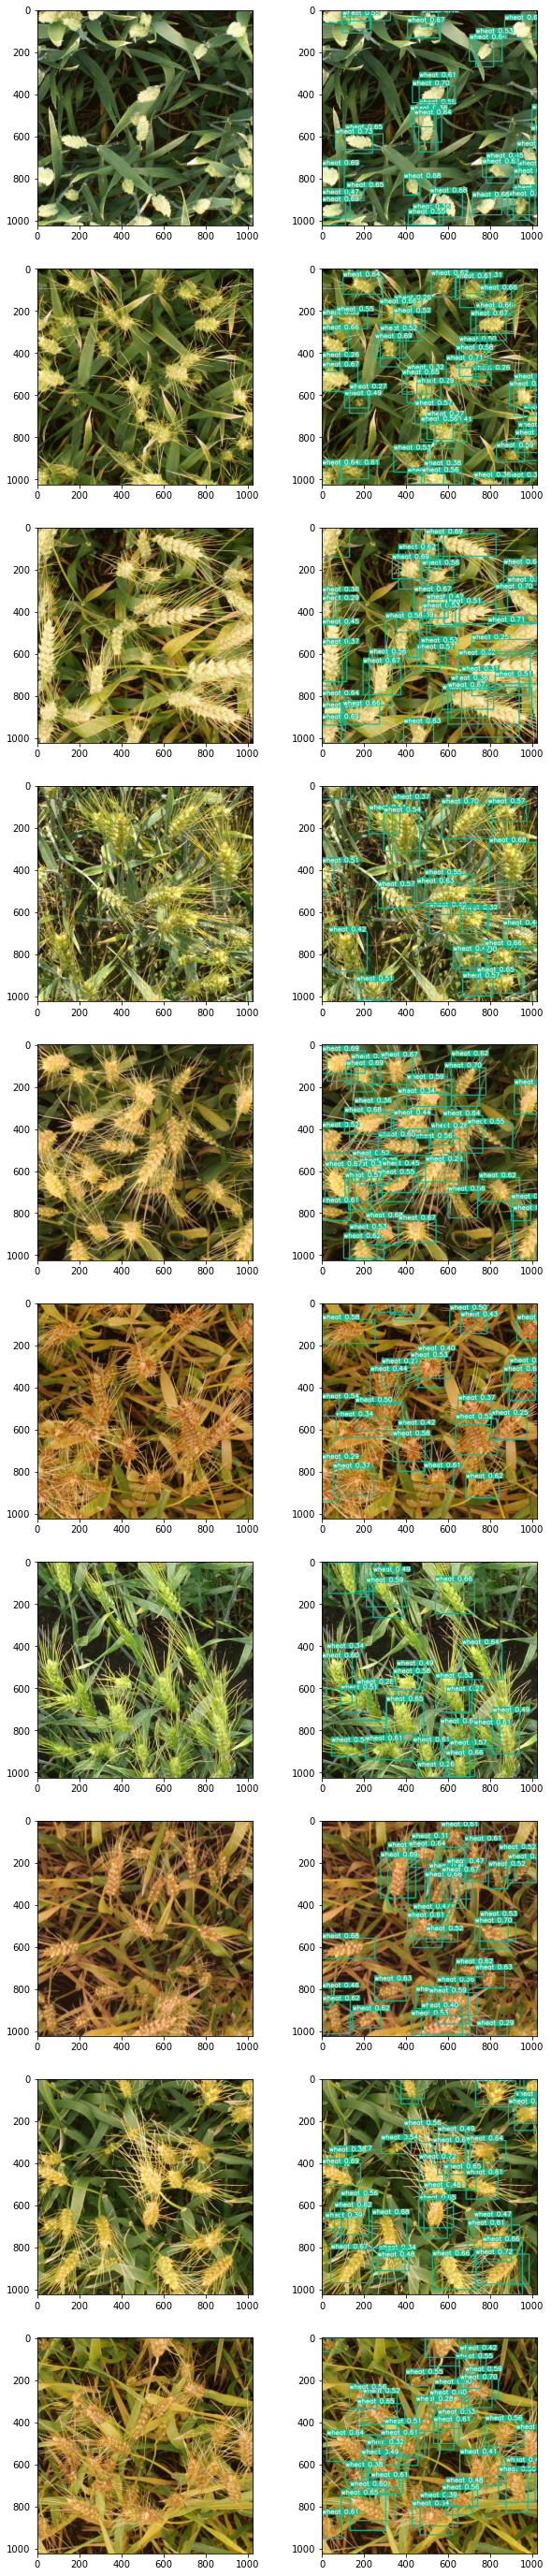

In [99]:
#Acual images
test_images = []
for image in os.listdir('input/test/'):
    test_images.append('input/test/'+image)
#Predicted images after wheat heads detection
pred_images = []
for image in os.listdir('runs/detect/exp2/'):
    pred_images.append('runs/detect/exp2/'+image)

plot_image(test_images,pred_images,len(test_images))